# Logistic Regression Methods
This notebook implements and compares different gradient descent methods for logistic regression.

## Import Essential Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Generate synthetic binary classification data

In [33]:
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42,
    n_clusters_per_class=1
)

## Plot the Data

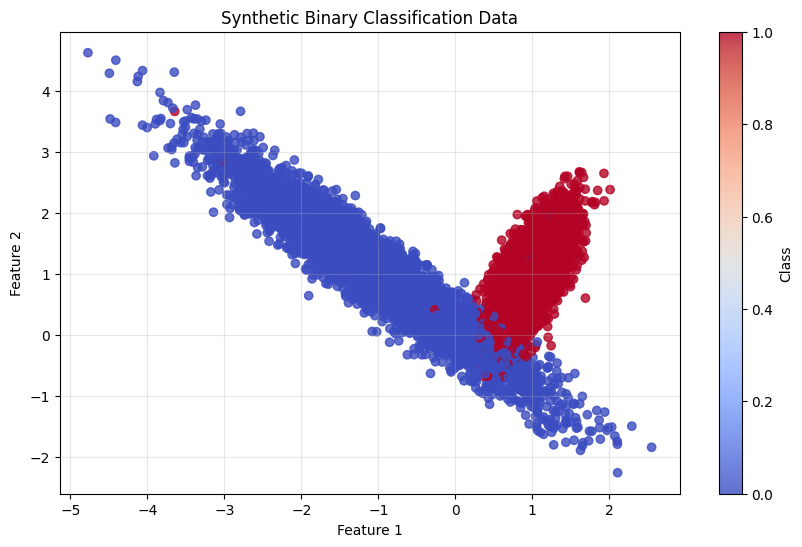

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.8)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

## Split the dataset into training (80%) and testing (20%)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features & Add bias column

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

## Implement important functions: Sigmoid, Cost, Predict, Accuracy

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-15
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

def calculate_accuracy(X, y, theta):
    return np.mean(predict(X, theta) == y)

## Implement Batch Gradient Descent (BGD)

In [40]:
def batch_gradient_descent(X, y, learning_rate=0.1, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_hist = []
    acc_hist = []

    for i in range(num_iterations):
        z = X @ theta
        h = sigmoid(z)
        gradient = X.T @ (h - y) / m
        theta -= learning_rate * gradient

        if i % 10 == 0:
            cost_hist.append(compute_cost(X, y, theta))
            acc_hist.append(calculate_accuracy(X, y, theta))

    return theta, cost_hist, acc_hist

## Implement Stochastic Gradient Descent (SGD)

In [22]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
  m, n = X.shape
  theta = np.zeros(n)
  cost_hist = []
  acc_hist = []

  for i in range(num_iterations):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for j in range(m):
      xi = X_shuffled[j:j+1]
      yi = y_shuffled[j:j+1]

      z = xi @ theta
      h = sigmoid(z)
      gradient = xi.T @ (h - yi)
      theta = theta - learning_rate * gradient

    if i % 10 == 0:
      cost = compute_cost(X, y, theta)
      cost_hist.append(cost)
      acc_hist.append(calculate_accuracy(X, y, theta))

  return theta, cost_hist, acc_hist

## Implement Mini-Batch Gradient Descent (MBGD)

In [23]:
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.1, num_iterations=1000):
  m, n = X.shape
  theta = np.zeros(n)
  cost_hist = []
  acc_hist = []

  for i in range(num_iterations):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    for j in range(0, m, batch_size):
      X_batch = X_shuffled[j:j+batch_size]
      y_batch = y_shuffled[j:j+batch_size]

      z = X_batch @ theta
      h = sigmoid(z)
      gradient = X_batch.T @ (h - y_batch) / len(y_batch)
      theta = theta - learning_rate * gradient

    if i % 10 == 0:
      cost = compute_cost(X, y, theta)
      cost_hist.append(cost)
      acc_hist.append(calculate_accuracy(X, y, theta))

  return theta, cost_hist, acc_hist

## Train with all Gradient Descent Methods

In [24]:
print("Training Batch Gradient Descent...")
theta_bgd, cost_history_bgd, acc_history_bgd = batch_gradient_descent(
    X_train_bias, y_train, learning_rate=0.1, num_iterations=1000)

print("Training Stochastic Gradient Descent...")
theta_sgd, cost_history_sgd, acc_history_sgd = stochastic_gradient_descent(
    X_train_bias, y_train, learning_rate=0.01, num_iterations=1000)

print("Training Mini-Batch Gradient Descent...")
theta_mbgd, cost_history_mbgd, acc_history_mbgd = mini_batch_gradient_descent(
    X_train_bias, y_train, batch_size=32, learning_rate=0.1, num_iterations=1000)

Training Batch Gradient Descent...
Training Stochastic Gradient Descent...
Training Mini-Batch Gradient Descent...


## Plot training cost and accuracy histories

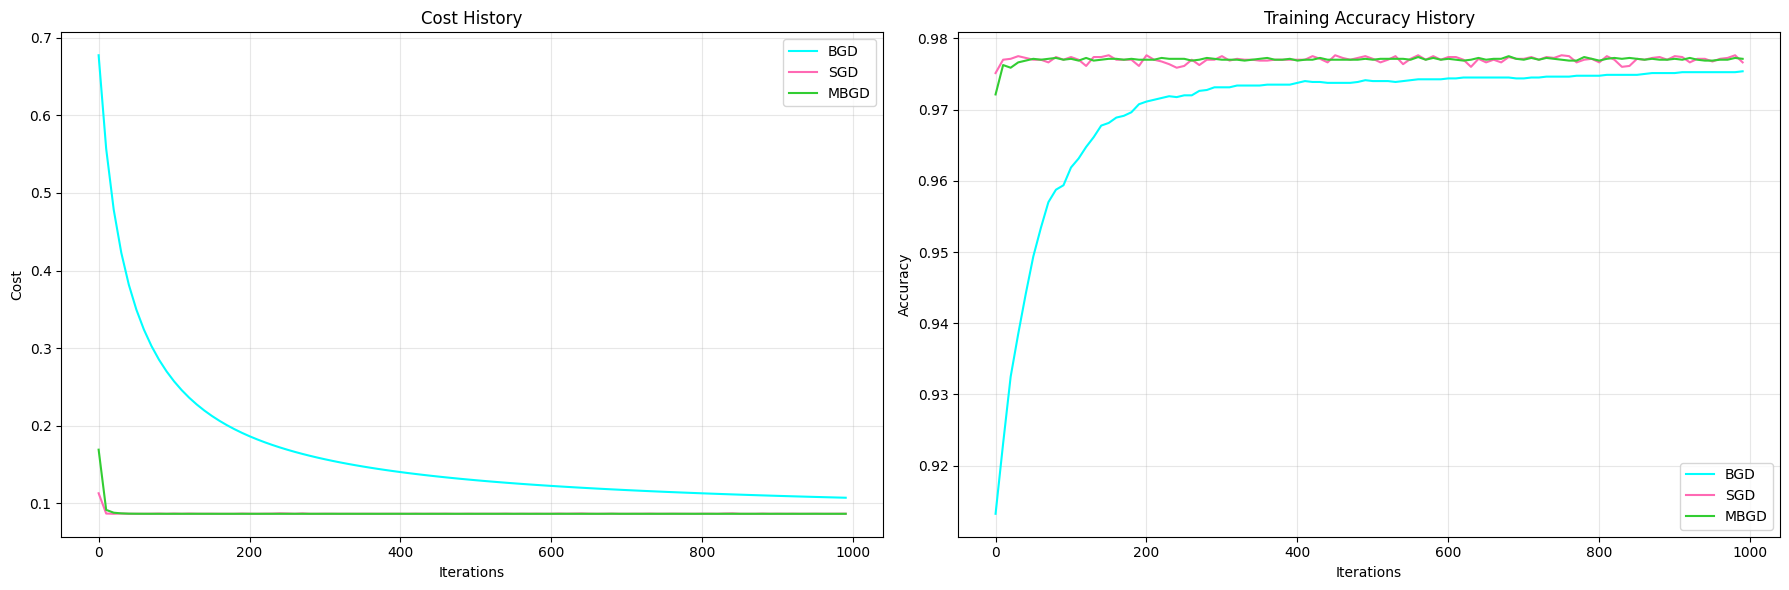

In [25]:
plt.figure(figsize=(18, 6))

# Cost History
plt.subplot(1, 2, 1)
plt.plot(range(0, 1000, 10), cost_history_bgd, label='BGD', color='#00FFFF')
plt.plot(range(0, 1000, 10), cost_history_sgd, label='SGD', color='#FF69B4')
plt.plot(range(0, 1000, 10), cost_history_mbgd, label='MBGD', color='#32CD32')
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy History
plt.subplot(1, 2, 2)
plt.plot(range(0, 1000, 10), acc_history_bgd, label='BGD', color='#00FFFF')
plt.plot(range(0, 1000, 10), acc_history_sgd, label='SGD', color='#FF69B4')
plt.plot(range(0, 1000, 10), acc_history_mbgd, label='MBGD', color='#32CD32')
plt.title('Training Accuracy History')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Evaluate all GD Methods on test data

In [27]:
print("\nTest Accuracy Results:")

bgd_accuracy = calculate_accuracy(X_test_bias, y_test, theta_bgd)
print(f"Batch Gradient Descent: {bgd_accuracy:.4f}")

sgd_accuracy = calculate_accuracy(X_test_bias, y_test, theta_sgd)
print(f"Stochastic Gradient Descent: {sgd_accuracy:.4f}")

mbgd_accuracy = calculate_accuracy(X_test_bias, y_test, theta_mbgd)
print(f"Mini-Batch Gradient Descent: {mbgd_accuracy:.4f}")


Test Accuracy Results:
Batch Gradient Descent: 0.9805
Stochastic Gradient Descent: 0.9825
Mini-Batch Gradient Descent: 0.9820


## Analyze the convergence speed for all Gradient Descent Methods

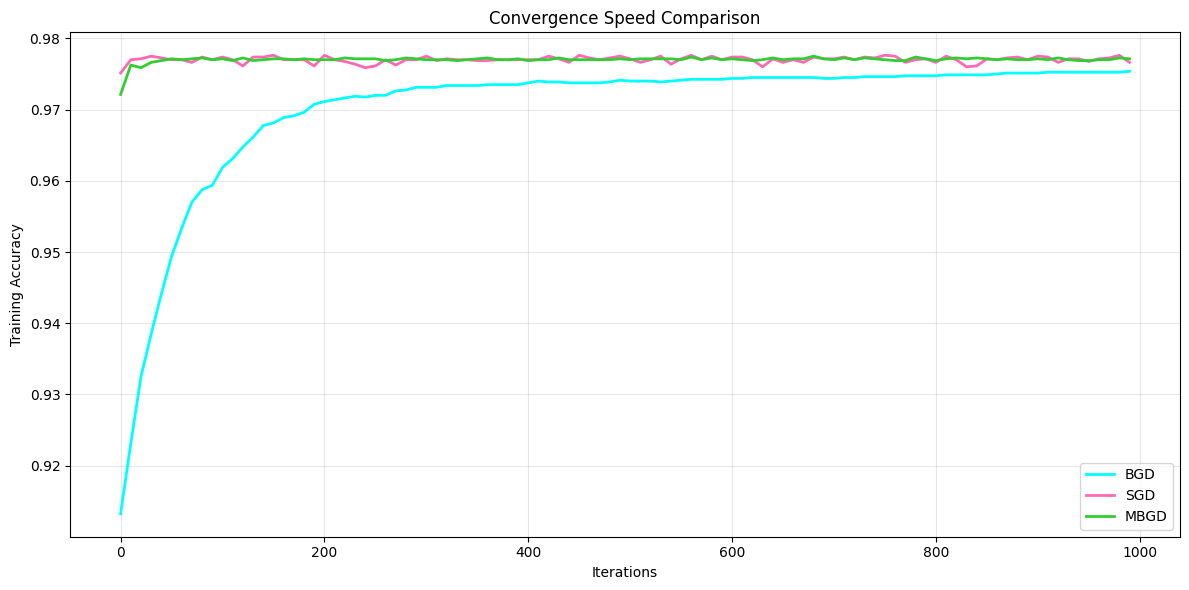

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, 1000, 10), acc_history_bgd,
         label='BGD', linewidth=2, color='#00FFFF')
plt.plot(range(0, 1000, 10), acc_history_sgd,
         label='SGD', linewidth=2, color='#FF69B4')
plt.plot(range(0, 1000, 10), acc_history_mbgd,
         label='MBGD', linewidth=2, color='#32CD32')
plt.title('Convergence Speed Comparison')
plt.xlabel('Iterations')
plt.ylabel('Training Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Train & Evaluate Scikit-Learn's Logistic Regression

In [29]:
print("\nTraining Scikit-Learn's Logistic Regression...")
sklearn_model = LogisticRegression(
    solver='lbfgs', max_iter=1000, random_state=42)
sklearn_model.fit(X_train_scaled, y_train)
sklearn_pred = sklearn_model.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_pred)
print(f"Scikit-Learn Logistic Regression: {sklearn_accuracy:.4f}")


Training Scikit-Learn's Logistic Regression...
Scikit-Learn Logistic Regression: 0.9825


## Decision boundaries visualization

<Figure size 1500x1000 with 0 Axes>

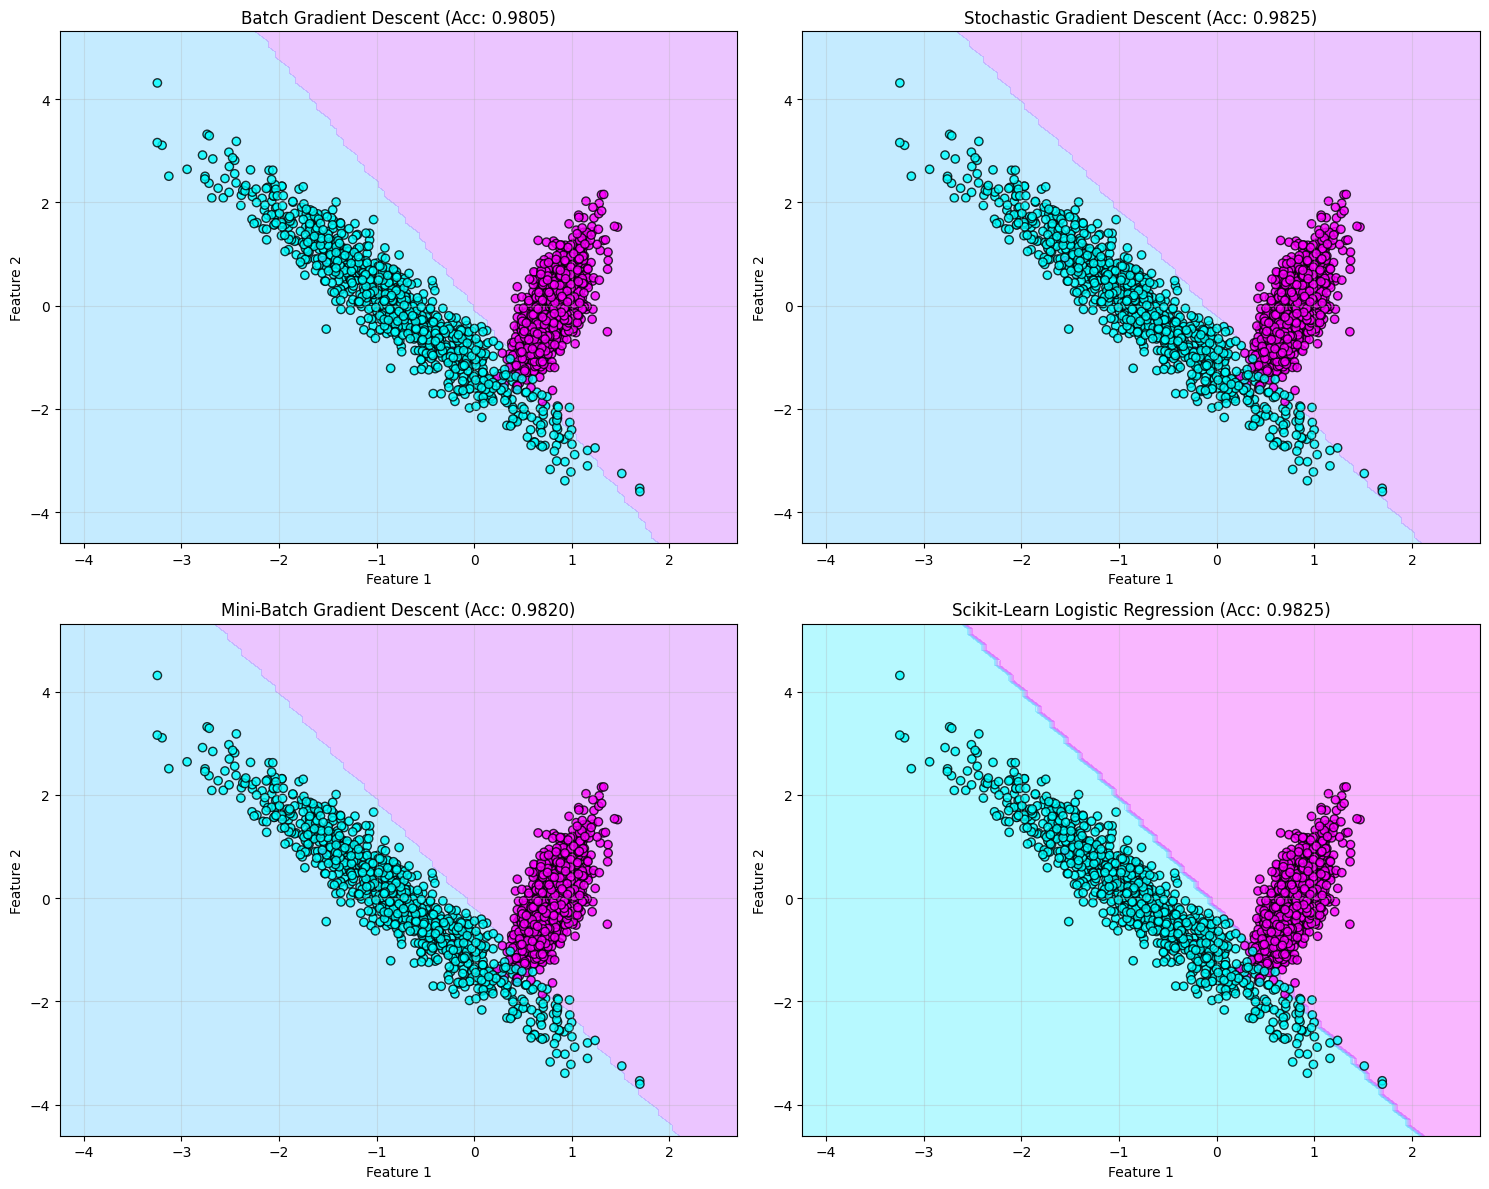

In [30]:
plt.figure(figsize=(15, 10))

# Create a mesh grid
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Function to plot decision boundary
def plot_decision_boundary(ax, theta, title):
  mesh_points = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
  Z = predict(mesh_points, theta)
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap='cool')
  ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
             c=y_test, cmap='cool', edgecolor='k', alpha=0.8)
  ax.set_title(title)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.grid(True, alpha=0.3)

# Function to plot sklearn decision boundary
def plot_sklearn_decision_boundary(ax, model, title):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap='cool')
  ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
             c=y_test, cmap='cool', edgecolor='k', alpha=0.8)
  ax.set_title(title)
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')
  ax.grid(True, alpha=0.3)


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot each model's decision boundary
plot_decision_boundary(
    axes[0, 0], theta_bgd, f'Batch Gradient Descent (Acc: {bgd_accuracy:.4f})')
plot_decision_boundary(
    axes[0, 1], theta_sgd, f'Stochastic Gradient Descent (Acc: {sgd_accuracy:.4f})')
plot_decision_boundary(
    axes[1, 0], theta_mbgd, f'Mini-Batch Gradient Descent (Acc: {mbgd_accuracy:.4f})')
plot_sklearn_decision_boundary(
    axes[1, 1], sklearn_model, f'Scikit-Learn Logistic Regression (Acc: {sklearn_accuracy:.4f})')
plt.tight_layout()
plt.show()

## Compare all models' accuracy

Final Model Comparison:
Batch Gradient Descent (BGD): 0.9805
Stochastic Gradient Descent (SGD): 0.9825
Mini-Batch Gradient Descent (MBGD): 0.9820
Scikit-Learn Logistic Regression: 0.9825



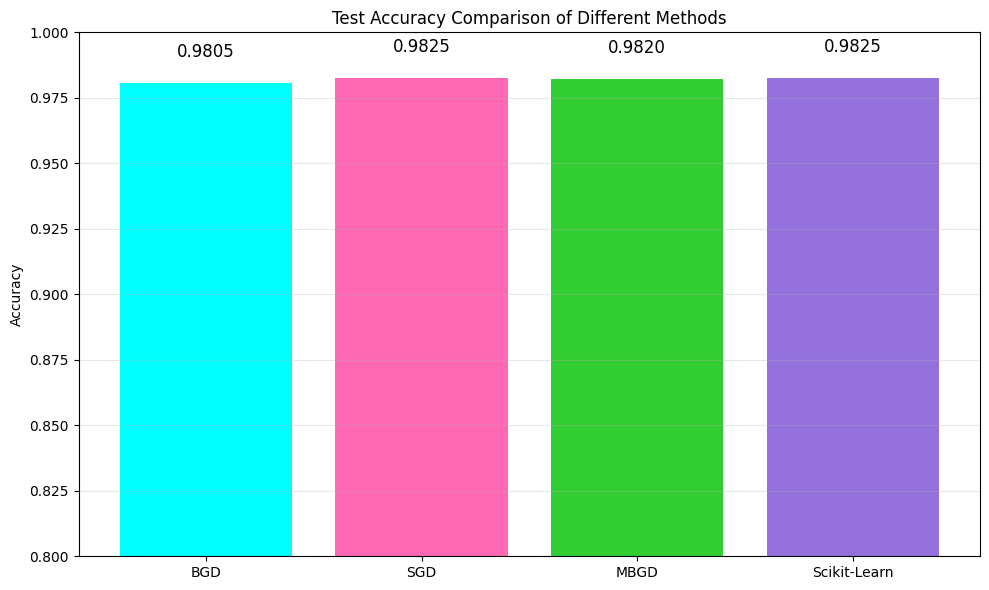

In [31]:
print("Final Model Comparison:")
print("=" * 50)
print(f"Batch Gradient Descent (BGD): {bgd_accuracy:.4f}")
print(f"Stochastic Gradient Descent (SGD): {sgd_accuracy:.4f}")
print(f"Mini-Batch Gradient Descent (MBGD): {mbgd_accuracy:.4f}")
print(f"Scikit-Learn Logistic Regression: {sklearn_accuracy:.4f}")
print("=" * 50 + "\n")

plt.figure(figsize=(10, 6))
methods = ['BGD', 'SGD', 'MBGD', 'Scikit-Learn']
accuracies = [bgd_accuracy, sgd_accuracy, mbgd_accuracy, sklearn_accuracy]
colors = ['#00FFFF', '#FF69B4', '#32CD32', '#9370DB']
plt.bar(methods, accuracies, color=colors)
plt.title('Test Accuracy Comparison of Different Methods')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.grid(True, alpha=0.3, axis='y')

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
  plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()